<a href="https://colab.research.google.com/github/kaanguney/TakeHomeExam_1/blob/master/Take_Home_Exam_1__Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Take-Home Exam 1: NYC Bike Rentals - Data Exploration

In this take-home exam, you are going to investigate bike rentals that took place in NYC. Most of the tasks involve the libraries that you have experienced, such as pandas and matplotlib. In addition, you are going to use `folium` as well, in order to plot spatial distributions.

**Submission Instructions**

---
Copy this assignment to you Drive. <font color = 'red'> `File` --> `Save a copy in Drive`</font>. Rename it as <font color = 'green'>`Lastname_Firstname_th1`</font>.

Write your solutions in the cells  marked <font color = 'green'>`# your code`</font>.

When you're done please submit your solutions as an <font color="red">`.ipynb`</font> file. To do so:


1.  Click on <font color="red">`File`</font>  at the top left on the Colab screen, then click on <font color = 'red'>`Download .ipynb`</font>.
2.   Then submit the <font color="red">`.ipynb`</font> version of your work on your SUCourse submission.


For any question, you may send an email to the TAs and LAs.

---

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path_prefix = "/content/drive/My Drive"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from os.path import join

%matplotlib inline

In [4]:
fname = "NYC-CityBike.csv"
df = pd.read_csv(join(path_prefix, fname))

df.head()

,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,2016-05-31 19:58:48,5/31/2016 20:03:51,167,E 39 St & 3 Ave,40.748901,-73.976049,501,FDR Drive & E 35 St,40.744219,-73.971212,19022,Subscriber,1990.0,1
1,2016-03-23 11:32:40,3/23/2016 12:06:44,439,E 4 St & 2 Ave,40.726281,-73.989780,319,Fulton St & Broadway,40.711066,-74.009447,18097,Customer,NaN,0
2,2016-05-09 07:31:19,5/9/2016 07:38:27,517,Pershing Square South,40.751581,-73.977910,491,E 24 St & Park Ave S,40.740964,-73.986022,17171,Subscriber,1985.0,1
3,2016-04-17 18:08:30,4/17/2016 18:11:27,3154,E 77 St & 3 Ave,40.773142,-73.958562,3140,1 Ave & E 78 St,40.771404,-73.953517,16765,Subscriber,1989.0,1
4,2016-05-24 21:10:12,5/24/2016 21:16:51,308,St James Pl & Oliver St,40.713079,-73.998512,251,Mott St & Prince St,40.723180,-73.994800,22554,Subscriber,1964.0,1


## Data Pre-Processing

#### Datetime Conversion

In the dataframe, the `starttime`, `stoptime` columns are object data types. Convert them to datetime objects as you did in the recitations.

In [5]:
# your code
cols = df.columns

# ************************* OPTIONAL *************************
# get the indexes for these column keys 
def return_indexes(df,cols):
  lencols = len(cols)
  index_starttime = -42 # dummy
  index_stoptime = -42 # dummy
  counter = 0
  for i in range(lencols):
    if(df.columns[i] == "starttime"):
      index_starttime = i
      counter += 1
    if(df.columns[i] == "stoptime"):
      index_stoptime = i
      counter += 1
    if(counter == 2):
      return index_starttime,index_stoptime
index_starttime,index_stoptime = return_indexes(df,cols)
# ************************* OPTIONAL *************************

from datetime import datetime # for conversion
df[df.columns[:2]].head()

,starttime,stoptime
0,2016-05-31 19:58:48,5/31/2016 20:03:51
1,2016-03-23 11:32:40,3/23/2016 12:06:44
2,2016-05-09 07:31:19,5/9/2016 07:38:27
3,2016-04-17 18:08:30,4/17/2016 18:11:27
4,2016-05-24 21:10:12,5/24/2016 21:16:51


In [0]:
date_len = len(df["starttime"])
col_starttime = np.array([])
col_stoptime = np.array([])

# convert here
for k in range(date_len):
  # hold both entries of the first two columns 
  hold_date_starttime = df["starttime"][k] 
  hold_date_stoptime = df["stoptime"][k]
  # convert both entries of the first two columns 
  converted_starttime = datetime.strptime(hold_date_starttime,"%Y-%m-%d %H:%M:%S")
  converted_stoptime = datetime.strptime(hold_date_stoptime,"%m/%d/%Y %H:%M:%S")
  # add to np.array for series conversion 
  col_starttime = np.append(col_starttime,[converted_starttime])
  col_stoptime = np.append(col_stoptime,[converted_stoptime])

# replace old Series with new
series_starttime = pd.Series(col_starttime)
series_stoptime = pd.Series(col_stoptime)
df["starttime"] = series_starttime
df["stoptime"] = series_stoptime

In [7]:
import sys 
# check if conversion made correctly for both columns 
if(np.dtype(df["starttime"]) == np.dtype("datetime64[ns]") and np.dtype(df["stoptime"]) == np.dtype("datetime64[ns]")):
  print("Conversions successful!")
else:
  print("Unsuccessful conversion, exiting the program!")
  print("Reset and run the kernel again with the correct code, then proceed!")
  sys.exit()

Conversions successful!


##### Check NaN Distributions

Show the percentage of NaN values in each column.

*hint: You may check recitation materials.*

In [8]:
# your code

# look for the null values 
print(df.isnull().sum())
print("\nThe only column with NaN values is the birth year column.")

starttime                     0
stoptime                      0
start station id              0
start station name            0
start station latitude        0
start station longitude       0
end station id                0
end station name              0
end station latitude          0
end station longitude         0
bikeid                        0
usertype                      0
birth year                 9078
gender                        0
dtype: int64

The only column with NaN values is the birth year column.


In [9]:
# display NaN percentages 
countNaN = df["birth year"].isnull().sum()
percent = countNaN / len(df)
print("NaN entry/total entry percentage for birth year column is {:.2%}".format(percent))

NaN entry/total entry percentage for birth year column is 10.76%


##### Dropping NaNs

In the following tasks, you will work on age distribution and grouppings. As a result, you need to get rid of NaN age values.

Drop NaN values from the dataframe.


In [0]:
# your code
df.dropna(axis = 0, how = "any", inplace = True)

In [11]:
# check if dropped correctly
df.isnull().sum()

starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

#### Distance Calculation

Create a new column named `distance` by calculating the distance between starting and ending locations of the bike rents.

You may utilize any library you wish. But we encourage you to use [Geopy](https://pypi.org/project/geopy/) library and its distance functionality.

Please check out the usage of the library from the url provided if you decided to use Geopy.

In [12]:
# first, install geopy 
%%bash 
pip install geopy

In [13]:
# your code
from geopy.distance import geodesic # for distance calculation

# reset the indexes 
df.reset_index(drop = True, inplace = True)

# col to be added 
distance = np.array([])
for k in range(len(df)):
  first = (df["start station latitude"][k],df["start station longitude"][k])
  sec = (df["end station latitude"][k],df["end station longitude"][k])
  dist = geodesic(first, sec).miles
  distance = np.append(distance,[dist])

# convert to series object and add to the original data
df["distance"] = pd.Series(distance)

# display briefly
df.head()

,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,distance
0,2016-05-31 19:58:48,2016-05-31 20:03:51,167,E 39 St & 3 Ave,40.748901,-73.976049,501,FDR Drive & E 35 St,40.744219,-73.971212,19022,Subscriber,1990.0,1,0.410832
1,2016-05-09 07:31:19,2016-05-09 07:38:27,517,Pershing Square South,40.751581,-73.977910,491,E 24 St & Park Ave S,40.740964,-73.986022,17171,Subscriber,1985.0,1,0.847329
2,2016-04-17 18:08:30,2016-04-17 18:11:27,3154,E 77 St & 3 Ave,40.773142,-73.958562,3140,1 Ave & E 78 St,40.771404,-73.953517,16765,Subscriber,1989.0,1,0.290561
3,2016-05-24 21:10:12,2016-05-24 21:16:51,308,St James Pl & Oliver St,40.713079,-73.998512,251,Mott St & Prince St,40.723180,-73.994800,22554,Subscriber,1964.0,1,0.723684
4,2016-01-19 21:44:44,2016-01-19 22:00:24,490,8 Ave & W 33 St,40.751551,-73.993934,492,W 33 St & 7 Ave,40.750200,-73.990931,22684,Subscriber,1978.0,1,0.183102


#### Age Distribution

As you may have checked, the age of people who uses bikes in the NYC varies a lot. To analyze this observation further, we can categorize the age of people using bikes. However, before doing that it is a good idea to check the age distribution first.

**Now, please perform following tasks.**

1. **Create a function to be applied on the dataframe to extract the age information from given `birth year` column. Then, create a new column called `age` with the information extracted.**
2. **Check age distribution (of column `age`) in a histogram.**
3. **Create your own age categories after observing the age distributions.**
4. **Express your rationale on your age category selection with markdown writing (and please use available formatting options).**

An example category list is given below.

*An example age category list:*
  - *Between 0 and 14 ages, child*
  - *Between 15 and 24 ages, young* 
  - *Between 25 and 64 ages, adult*
  - *For people who are 65+, senior*

In [14]:
# your code

# create an age column
def age_extract(df):
  # get attributes 
  cols = df.columns
  # create a numpy instance for age column
  age = np.array([])
  for k in cols:
    if(k == "birth year"):
      for j in range(len(df["birth year"])):
        age_entry = 2020 - df["birth year"][j]
        age = np.append(age,[age_entry])
      break
  # convert to series 
  return pd.Series(age)

# add the column to the dataframe
extracted = age_extract(df)
df["age"] = extracted.astype("int64")
# check 
df.head()

,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,distance,age
0,2016-05-31 19:58:48,2016-05-31 20:03:51,167,E 39 St & 3 Ave,40.748901,-73.976049,501,FDR Drive & E 35 St,40.744219,-73.971212,19022,Subscriber,1990.0,1,0.410832,30
1,2016-05-09 07:31:19,2016-05-09 07:38:27,517,Pershing Square South,40.751581,-73.977910,491,E 24 St & Park Ave S,40.740964,-73.986022,17171,Subscriber,1985.0,1,0.847329,35
2,2016-04-17 18:08:30,2016-04-17 18:11:27,3154,E 77 St & 3 Ave,40.773142,-73.958562,3140,1 Ave & E 78 St,40.771404,-73.953517,16765,Subscriber,1989.0,1,0.290561,31
3,2016-05-24 21:10:12,2016-05-24 21:16:51,308,St James Pl & Oliver St,40.713079,-73.998512,251,Mott St & Prince St,40.723180,-73.994800,22554,Subscriber,1964.0,1,0.723684,56
4,2016-01-19 21:44:44,2016-01-19 22:00:24,490,8 Ave & W 33 St,40.751551,-73.993934,492,W 33 St & 7 Ave,40.750200,-73.990931,22684,Subscriber,1978.0,1,0.183102,42


[Text(0, 0.5, 'Density')]

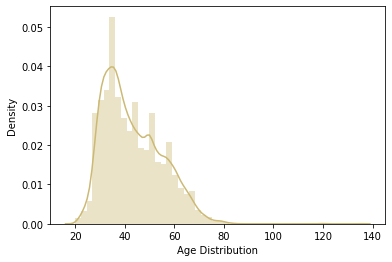

In [15]:
# plot the histogram 

# use seaborn for better plots 
# smoothed version of histogram 
import seaborn as sns
sns.set_color_codes()
ax = sns.distplot(df.age, kde = True, color = "y", axlabel = "Age Distribution")
ax.set(ylabel = "Density")

[Text(0, 0.5, 'Density')]

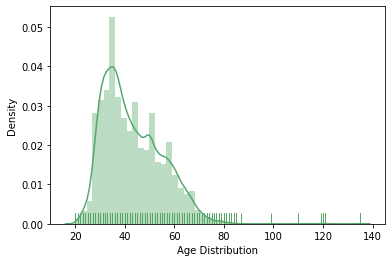

In [16]:
# draw another histogram with rugs, ticks that show each observation
ax = sns.distplot(df.age, kde = True, rug = True, color = "g",axlabel = "Age Distribution")
ax.set(ylabel = "Density")

[Text(0, 0.5, 'Density')]

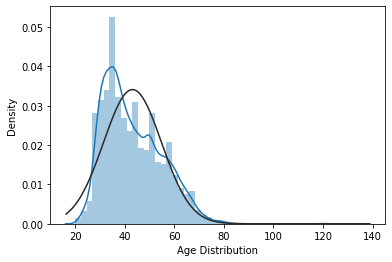

In [17]:
from scipy import stats
# fit the normal distribution 
ax = sns.distplot(df.age, fit = stats.norm, kde = True,axlabel = "Age Distribution")
ax.set(ylabel = "Density")

[Text(0, 0.5, 'Density')]

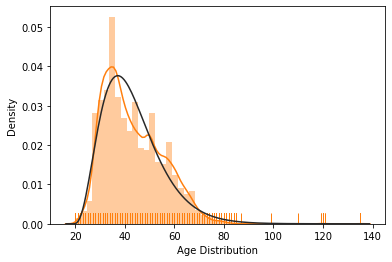

In [18]:
# try gamma distribution 
ax = sns.distplot(df.age, fit = stats.gamma, kde = True, color = "tab:orange",axlabel = "Age Distribution",rug = True)
ax.set(ylabel = "Density")

# fits the gamma distbution better than Gaussian distribution 

***_Mathematically, gamma distribution fits the ages very well._***

>_My approach to divide construct age categories is to centralize the outlier-ish age category in as a single category of its own._

>***_Therefore, categories are as follows:_***

>> _category 1 = (20-25)_ -> (Adolescent)

>> _category 2 = (26-35)_ -> (Young)

>> _category 3 = (36-54)_ -> (Adult)

>> _category 4 = (55-60)_ -> (Adult - Elderly)

>> _category 5 = 61+_ -> (Elderly)


#### Age Groups


In order to categorize bike users in terms of their ages, create a function for age categorization called `age_categorize` by referring to the categories and their corresponding age intervals that you explained and justified above. Then, **apply** this function to create a new column in the dataframe called `age_category`.

In [19]:
# your code

# create the functions for the task 
def age_categorize(k):
  # new column to be added
  age_category = np.array([])
  if(k < 26):
    age_category = np.append(age_category, ["Adolescent"])
  elif(26 <= k <= 35):
    age_category = np.append(age_category, ["Young"])
  elif(36 <= k <= 54):
    age_category = np.append(age_category, ["Adult"])
  elif(55 <= k <= 60):
    age_category = np.append(age_category, ["Adult - Elderly"])
  else:
    age_category = np.append(age_category, ["Elderly"])
  return pd.Series(age_category)

# add new column
df["age_category"] = df.age.apply(age_categorize)

# check
df.head()

,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,distance,age,age_category
0,2016-05-31 19:58:48,2016-05-31 20:03:51,167,E 39 St & 3 Ave,40.748901,-73.976049,501,FDR Drive & E 35 St,40.744219,-73.971212,19022,Subscriber,1990.0,1,0.410832,30,Young
1,2016-05-09 07:31:19,2016-05-09 07:38:27,517,Pershing Square South,40.751581,-73.977910,491,E 24 St & Park Ave S,40.740964,-73.986022,17171,Subscriber,1985.0,1,0.847329,35,Young
2,2016-04-17 18:08:30,2016-04-17 18:11:27,3154,E 77 St & 3 Ave,40.773142,-73.958562,3140,1 Ave & E 78 St,40.771404,-73.953517,16765,Subscriber,1989.0,1,0.290561,31,Young
3,2016-05-24 21:10:12,2016-05-24 21:16:51,308,St James Pl & Oliver St,40.713079,-73.998512,251,Mott St & Prince St,40.723180,-73.994800,22554,Subscriber,1964.0,1,0.723684,56,Adult - Elderly
4,2016-01-19 21:44:44,2016-01-19 22:00:24,490,8 Ave & W 33 St,40.751551,-73.993934,492,W 33 St & 7 Ave,40.750200,-73.990931,22684,Subscriber,1978.0,1,0.183102,42,Adult


## Extracting Insights

#### Distance Distributions

With a histogram, plot the distribution of the `distance` column that you added to the dataframe in the earlier steps.


[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Distance (Miles)')]

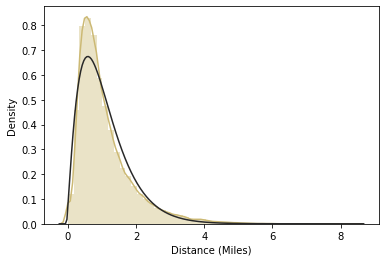

In [20]:
# your code

ax = sns.distplot(df.distance, color = "y", fit = stats.gamma)
ax.set(ylabel = "Density", xlabel = "Distance (Miles)")

#### Observation Regarding Distances

Does something seem odd? Some of the distances between start and end points seem to be 0. This should be the cases where people leaving the bikes to the same station where they rent them. 

To make sure, 
1. Please find those cases by showing the total counts of rows where the starting and ending stations are same.
2. Plot those cases against rentals do not start and end in same stations in a bar chart.

*(You can also utilize the id of these bike rental stations.)*

In [21]:
# your code

# count how many observations are distance of 0
count = 0
for entry in df.distance:
  if(entry == 0):
    count += 1 
freq = count / len(df.distance)
print("For distance = 0; datapoint count: {}, frequency count: {:.2f}".format(count,freq))

For distance = 0; datapoint count: 902, frequency count: 0.01


In [22]:
# constuct dist_df
dist = np.array([])

# hold as binary data, (0 = zero distance, 1 = other)
for x in df.distance:
  if(x == 0):
    dist = np.append(dist,[0])
  dist = np.append(dist,[1])

# check
container = {"Binary Distance" : dist}
dist_df = pd.DataFrame(data = container, dtype = np.int64)
dist_df.head()

,Binary Distance
0,1
1,1
2,1
3,1
4,1


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Distance Distribution (Binary)')]

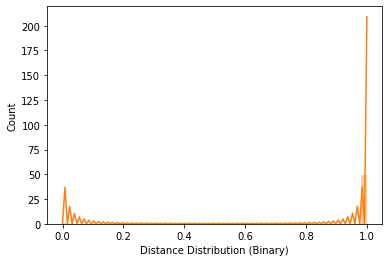

In [23]:
# plot bar graph 
"""an alternative is to create two separate dataframes for binary variables 
   and then use sns.barplot(...)"""
   
ax = sns.distplot(dist_df, norm_hist = True, color = "tab:orange")
ax.set(xlabel = "Distance Distribution (Binary)", ylabel = "Count")

#### Rentals in Weekdays vs. Weekends

Since we have the date information for the bike rentals, by utilizing the functionality of the `datetime` library we can obtain the day information from the `starttime` and `stoptime`.

Now, your tasks are following:
  
  - Extract the day of week (Monday, Tuesday, etc.) information from `starttime` column and create a new column in the dataframe called `day`
  - Using this column, create a new column called `time_of_week`, which shows if the `day` value is in weekdays are in weekend days.
  - Create another column named `hour` by extracting the hour attribute from start time. 
  - Then, with these columns, show the average bike rental amounts per hour for weekdays and weekends in a 2x1 figure layout with line charts.

Please check the documentation of the [date objects](https://docs.python.org/3/library/datetime.html#datetime.date) in the datetime library from the link provided.

In [24]:
# your code

import calendar 

# create day column
def create_day(x):
  # x is a datetime object
  return calendar.day_name[x.weekday()]

# create time of week column
def create_time_of_week(day):
  if(day == "Saturday" or day == "Sunday"):
    return "Weekend"
  else:
    return "Weekday"

# create hour column
def create_hour(date):
  return date.hour

# add
df["day"] = df["starttime"].apply(create_day)
df["time_of_week"] = df.day.apply(create_time_of_week)
df["hour"] = df.starttime.apply(create_hour)

# check 
df.head()

,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,distance,age,age_category,day,time_of_week,hour
0,2016-05-31 19:58:48,2016-05-31 20:03:51,167,E 39 St & 3 Ave,40.748901,-73.976049,501,FDR Drive & E 35 St,40.744219,-73.971212,19022,Subscriber,1990.0,1,0.410832,30,Young,Tuesday,Weekday,19
1,2016-05-09 07:31:19,2016-05-09 07:38:27,517,Pershing Square South,40.751581,-73.977910,491,E 24 St & Park Ave S,40.740964,-73.986022,17171,Subscriber,1985.0,1,0.847329,35,Young,Monday,Weekday,7
2,2016-04-17 18:08:30,2016-04-17 18:11:27,3154,E 77 St & 3 Ave,40.773142,-73.958562,3140,1 Ave & E 78 St,40.771404,-73.953517,16765,Subscriber,1989.0,1,0.290561,31,Young,Sunday,Weekend,18
3,2016-05-24 21:10:12,2016-05-24 21:16:51,308,St James Pl & Oliver St,40.713079,-73.998512,251,Mott St & Prince St,40.723180,-73.994800,22554,Subscriber,1964.0,1,0.723684,56,Adult - Elderly,Tuesday,Weekday,21
4,2016-01-19 21:44:44,2016-01-19 22:00:24,490,8 Ave & W 33 St,40.751551,-73.993934,492,W 33 St & 7 Ave,40.750200,-73.990931,22684,Subscriber,1978.0,1,0.183102,42,Adult,Tuesday,Weekday,21


In [0]:
# filter for weekdays 
weekday = df[df.time_of_week == "Weekday"]
# filter for weekends 
weekend = df[df.time_of_week == "Weekend"]

# reset the indexes 
weekday.reset_index(drop = True, inplace = True)
weekend.reset_index(drop = True, inplace = True)

# domain 
hours = np.arange(25)

# range
weekday_val = np.array([])
weekend_val = np.array([])

for x in range(25):
  search = True
  count = 0
  while(search):
    for y in range(len(weekday)):
      if(x == weekday.hour[y]):
        count += 1
    search = False
  weekday_val = np.append(weekday_val,[count])

for m in range(25):
  search = True
  count = 0
  while(search):
    for n in range(len(weekend)):
      if(m == weekend.hour[n]):
        count += 1
    search = False
  weekend_val = np.append(weekend_val,[count])

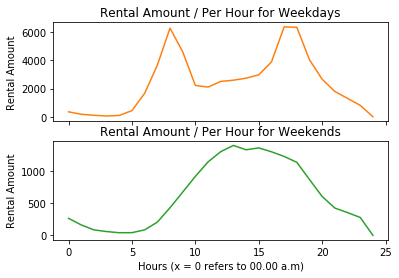

In [26]:
# plot
fig, ax = plt.subplots(2,1)

# plot the rental amounts vs hours for weekdays 
ax[0].plot(hours,weekday_val,"tab:orange")
ax[0].set(xlabel = "Hours (x = 0 refers to 00.00 a.m)", ylabel = "Rental Amount")
ax[0].set_title("Rental Amount / Per Hour for Weekdays")

# plot the rental amounts vs hours for weekends
ax[1].plot(hours,weekend_val,"tab:green")
ax[1].set(xlabel = "Hours (x = 0 refers to 00.00 a.m)", ylabel = "Rental Amount")
ax[1].set_title("Rental Amount / Per Hour for Weekends")

# hide x labels and tick labels for top plots and y ticks for right plots
for axis in ax:
  axis.label_outer()

# check
plt.show()

#### Age Distributions by Gender

In our original data, gender information was mapped as follows:

    - 0: unknown
    - 1: male
    - 2: female

Use this information to display the age distributions of male and female bike users in different graphs. To do that, please use **matplotlib**'s `subplots` option to create 2 graphs located in the same row.

Text(0.5, 1.0, 'Age Distribution w.r.t Gender')

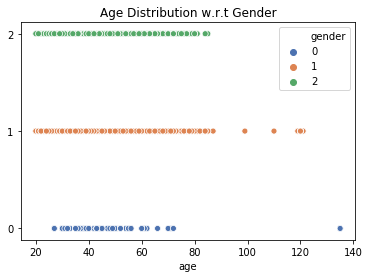

In [27]:
# your code

# a very intuitive scatter plot 
ax = sns.scatterplot(df.age, df.gender, data = df, hue = "gender", palette = "deep")
ax.set_yticks([0,1,2])
ax.set(ylabel = "")
ax.set_title("Age Distribution w.r.t Gender")

# however we are required to draw 2 graphs located in the same row
# proceed to the next cell

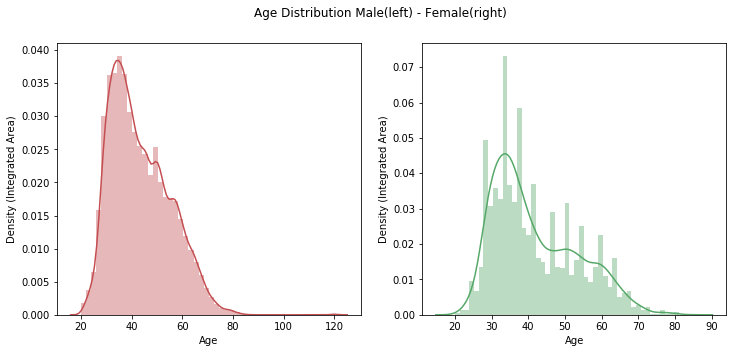

In [28]:
# filter for males
m_bikers = df[df.gender == 1]
# filter for females 
f_bikers = df[df.gender == 2]

# reset the indexes 
m_bikers.reset_index(drop = True, inplace = True)
f_bikers.reset_index(drop = True, inplace = True)

# distributions 
fig, ax = plt.subplots(1,2, figsize = (12,5))
fig.suptitle("Age Distribution Male(left) - Female(right)")

# range 
ages = np.arange(140)

# male bikers
sns.distplot(m_bikers.age, kde = True, rug = False, ax = ax[0], color = "r")
# female bikers 
sns.distplot(f_bikers.age, kde = True, rug = False, ax = ax[1], color = "g")

# label the axis 
ax[0].set(xlabel = "Age", ylabel = "Density (Integrated Area)")
ax[1].set(xlabel = "Age", ylabel = "Density (Integrated Area)")

# check
plt.show()

#### Usage by Age Groups

Write a function that will display the usage of bike rental system by different age groups in a bar chart *for a given time interval*. For this taks, the first step is provided for you, please complete the implementation of the function named `age_groups_in_time_intervals`. The function will take two datetime parameters for `starttime` values and will show age group ratios in pie chart.

### ***_Define 4 intervals of range 6_***

> ***1)*** _(1 - 6)_

> ***2)*** _(7 - 12)_

> ***3)*** _(13 - 18)_

> ***4)*** _(19 - 24)_

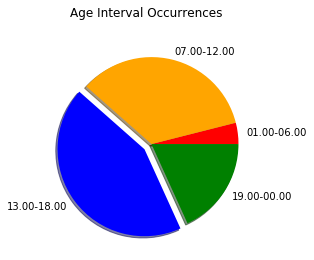

In [29]:
# no implementation visible, let's create one from the start 
# first only create one for the intervals 

# count of the specified interval observed
intervals = np.array([])

# input dataframe & intervals, counts occurrences for the given labels 
def count_for_intervals(df,intervals):
  # counters count the occurence of each interval
  counter1 = 0
  counter2 = 0
  counter3 = 0
  counter4 = 0
  for k in range(len(df.hour)):
    # Remember 0 will be treated as 24
    if(df.hour[k] == 0):
      counter4 += 1
    elif(1 <= df.hour[k] <= 6):
      counter1 += 1
    elif(7 <= df.hour[k] <= 12):
      counter2 += 1
    elif(13 <= df.hour[k] <= 18):
      counter3 += 1 
    else:
      counter4 += 1
    # add all
  intervals = np.append(intervals,[counter1])
  intervals = np.append(intervals,[counter2])
  intervals = np.append(intervals,[counter3])
  intervals = np.append(intervals,[counter4]) 
  return intervals

# pie-plot
fig, ax = plt.subplots(1)
fig.suptitle("Age Interval Occurrences")
sizes = count_for_intervals(df,intervals)
explode = [0,0,0.1,0]
labels = ["01.00-06.00","07.00-12.00","13.00-18.00","19.00-00.00"]
plt.pie(sizes,explode = explode, labels = labels, colors = ["red","orange","blue","green"], shadow = True)
plt.show()

In [30]:
# find and split at two datetime objects to create intervals 

def get_split(df):
  counter = 0
  split1,split2 = 0,0
  for k in range(len(df.hour)):
    if(counter == 2):
      return split1,split2
    if(df.hour[k] == 17):
      split1 = k
      counter += 1
    if(df.hour[k] == 18):
      split2 = k
      counter += 1

# find splits 
print("First split:%s\tSecond split:%s" % get_split(df))

First split:17	Second split:2


In [0]:
# now, draw the pie graph for the task 

# first split is 0-12, second is 13-23
split_sizes = np.array([])

# input splits
first = df.starttime[17]
sec = df.starttime[2]
def age_groups_in_time_intervals(first,sec,split_sizes,filtered_df):
  split1 = first.hour
  # no need to use second split
  counter1,counter2 = 0,0
  for k in range(len(filtered_df.hour)):
    if(filtered_df.hour[k] <= split1):
      counter1 += 1
    else:
      counter2 += 1
  # add
  split_sizes = np.append(split_sizes,[counter1])
  split_sizes = np.append(split_sizes,[counter2])
  return split_sizes

# males
m_interval = df[df.gender == 1]
m_interval.reset_index(drop = True, inplace = True)
pie_male = age_groups_in_time_intervals(first,sec,split_sizes,m_interval)

# female
split_sizes = np.array([]) # reset first
f_interval = df[df.gender == 2]
f_interval.reset_index(drop = True, inplace = True)
pie_female = age_groups_in_time_intervals(first,sec,split_sizes,f_interval)

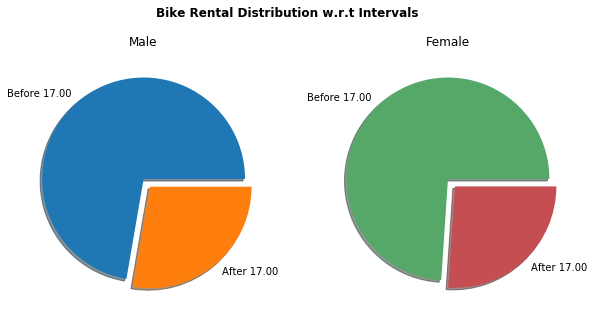

In [32]:
# plot both in the same row 
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))

fig.suptitle("Bike Rental Distribution w.r.t Intervals", fontweight = "bold")
explode = (0, 0.1)

# male 
labels = ["Before 17.00", "After 17.00"]
ax1.pie(x = pie_male, explode = explode, labels = labels, shadow = True)
ax1.set_title("Male")

# female 
labels = ["Before 17.00", "After 17.00"]
ax2.pie(x = pie_female, explode = explode, labels = labels, shadow = True, colors = ["g","r"])
ax2.set_title("Female")

# check
plt.show()

#### Age Groups vs Distance 

Similar to the task above, we can also investigate the variance of distance between age groups. Plot histograms of distances in each age group in a juxtaposed 1x3 layout.

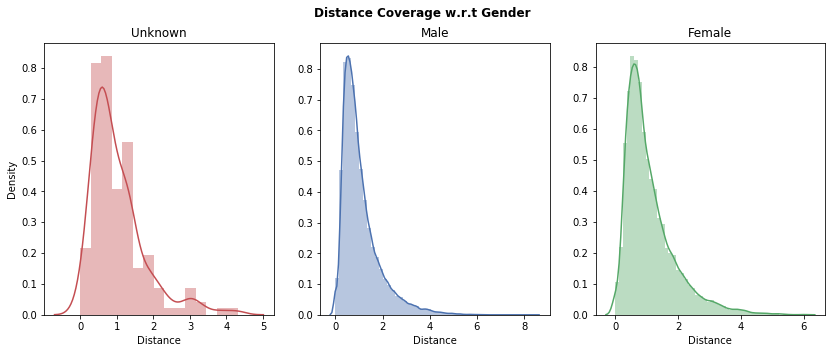

In [33]:
# your code

# filter for gender 
unknown = df[df.gender == 0]
male = df[df.gender == 1]
female = df[df.gender == 2]

# reset indexes 
unknown.reset_index(drop = True, inplace = True)
male.reset_index(drop = True, inplace = True)
female.reset_index(drop = True, inplace = True)

# plot 
fig, ax = plt.subplots(1,3, figsize = (14,5))
fig.suptitle("Distance Coverage w.r.t Gender", fontweight = "bold")

sns.distplot(unknown.distance, kde = True, ax = ax[0], color = "r")
sns.distplot(male.distance, kde = True, ax = ax[1], color = "b")
sns.distplot(female.distance, kde = True, ax = ax[2], color = "g")

# set labels 
x = "Distance"
for k in range(3):
  if(k == 0):
    ax[k].set(xlabel = x, ylabel = "Density")
    ax[k].set_title("Unknown")
  elif(k == 1):
    ax[k].set(xlabel = x)
    ax[k].set_title("Male")
  else:
    ax[k].set(xlabel = x)
    ax[k].set_title("Female")

# check
plt.show()

## Spatial Visualizations

In this section, you are going to utilize the latitude and longitude values associated with bike rentals and visualize them on a real-world map. 

#### Bike Stations in NYC

From all locations (latitude, longitude pairs) in start and end stations, extract the unique ones and display them as circle markers on the map.

In [0]:
# your solution

# fill this with unique pairs 
fill_locs = set()

def fill_unique(df,fill_locs):
  lencol = len(df)
  for k in range(lencol):
    fill_locs.add(((df["start station latitude"][k]),(df["start station longitude"][k])))
    fill_locs.add(((df["end station latitude"][k]),(df["end station longitude"][k])))
  # return as an array 
  return list(fill_locs)

# get unique location data  
unique_locs = fill_unique(df,fill_locs)

In [84]:
# for spatial visualisation 
import folium

# construct map
m = folium.Map()

# add circle markers 
marker_count = len(unique_locs)
for k in range(marker_count):
  folium.CircleMarker(location = unique_locs[k], 
                radius = 3,  
                color = "crimson",
                tooltip = "Lebron James is the GOAT",
               ).add_to(m)

# check
display(m)

#### Heatmap of Rentals

Extract the latitude and longitude values of rental start locations and display their heatmap. 

In order to generate a heatmap, you may use the link below.

https://python-visualization.github.io/folium/plugins.html#folium.plugins.HeatMap

In [141]:
# your code

# add locations to a matrix 
locs = np.array([])
LenUnique = len(unique_locs)
for k in range(LenUnique):
  locs = np.append(locs,[unique_locs[k][0]])
  locs = np.append(locs,[unique_locs[k][1]])

# reshape the array 
locs = locs.reshape(490,2)

# construct heatmap
HeatMap(locs).add_to(m)

# show
display(m)

In [0]:
# end of TAKE HOME EXAM 1...